<a href="https://colab.research.google.com/github/italomarcelogit/python.free/blob/master/NLP_FRAN%C3%87AIS_SPACY_%2B_VADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ÉTUDIER LE FRANÇAIS AVEC NLP SPACY** <BR> 
PAR ITALO COSTA

In [1]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

!pip install googletrans
import googletrans
from googletrans import Translator

!pip install feedparser
import feedparser

In [2]:
import plotly.express as px

In [3]:
import pandas as pd

In [4]:
import re
import string

In [5]:
import spacy

In [6]:
# to update spacy. 
# I'll use portuguese spacy than I need  update it in Colab
!pip install -U spacy

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.2)


In [7]:
import spacy.cli
spacy.cli.download("fr_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [8]:
from spacy.lang.fr.stop_words import STOP_WORDS as stopWordFR

In [17]:
from spacy import displacy
from IPython.display import SVG, display

In [13]:
nlpFR = spacy.load('fr_core_news_sm')

In [15]:
phrases = [
"Je pense donc je suis",
"Le plus grand plaisir dans la vie, c’est de faire les choses que les gens disent impossibles",
"Je connais mes limites, c’est pourquoi je vais au-delà.",
"Un homme est bien fort quand il s’avoue sa faiblesse",
"On ne voit bien qu’avec le coeur. L’essentiel est invisible pour les yeux",
"On ne voit bien qu’avec le coeur. L’essentiel est invisible pour les yeux",
"Fais de ta vie un rêve, et d’un rêve, une réalité",
"Rien de grand ne s’est fait dans le monde sans passion",
"Il faut manger pour vivre, et non pas vivre pour manger",
"Je veux être ton ‘bonjour’ préféré et ton plus dur ‘au revoir’",
"Si j’avais le choix entre la vie et toi, je te choisirais car tu es ma seule raison de vivre"
]


# **Visualiser l'analyse des dépendances**

In [18]:
def showSVG(s):
  display(SVG(s))

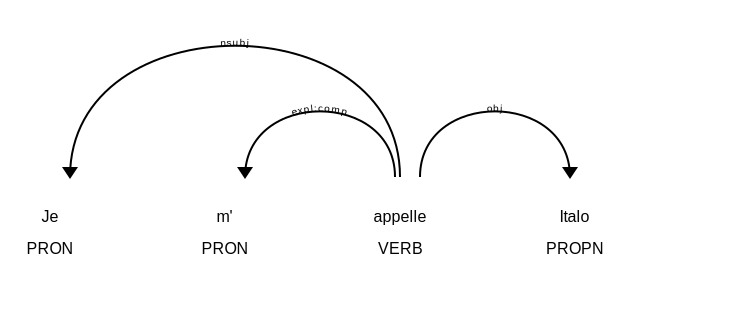

In [20]:
doc = nlpFR("Je m'appelle Italo")
graph01 = displacy.render(doc)
showSVG(graph01)

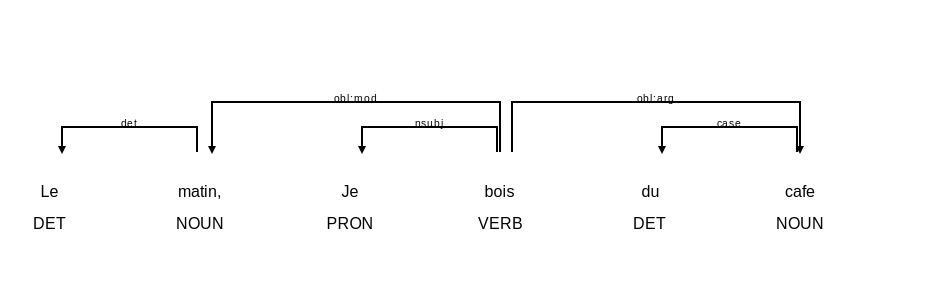

In [30]:
doc = nlpFR("Le matin, Je bois du cafe")
graph01 = displacy.render(doc, options={'compact': True})
showSVG(graph01)

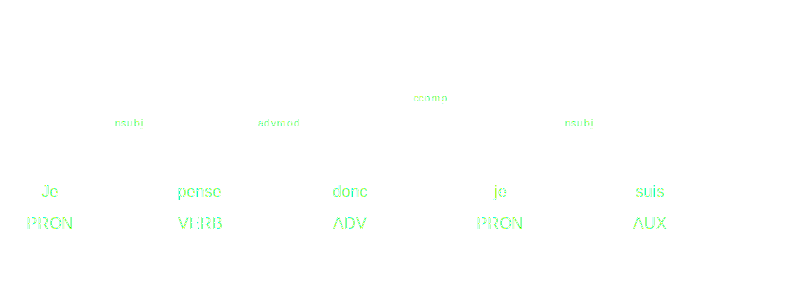

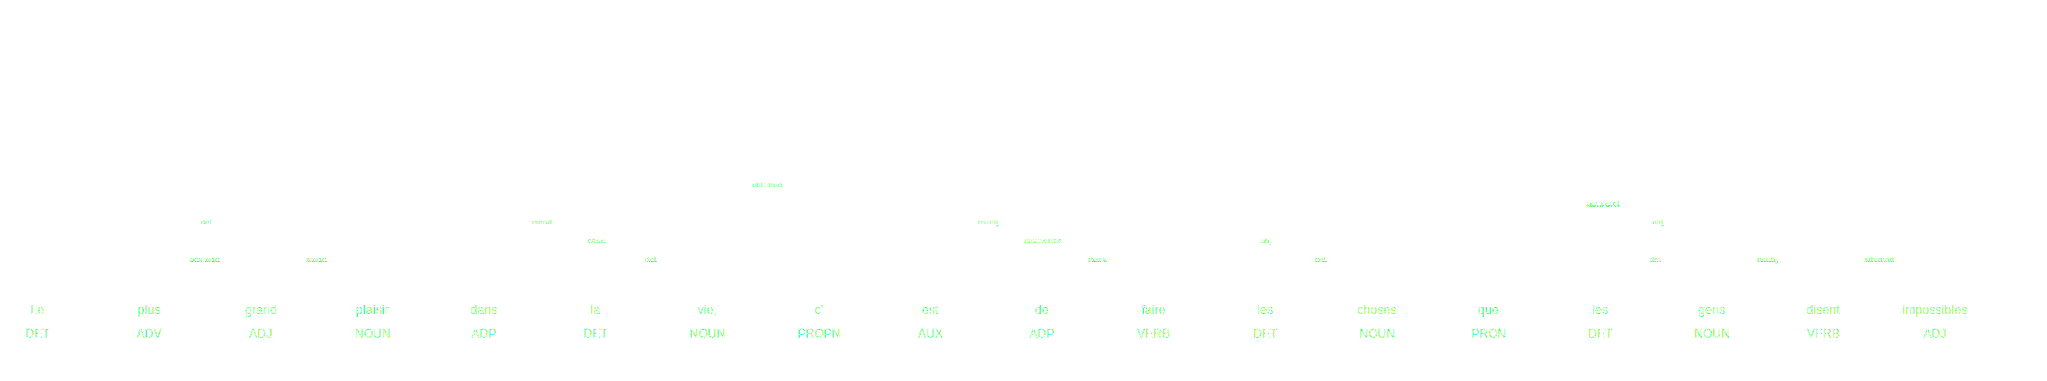

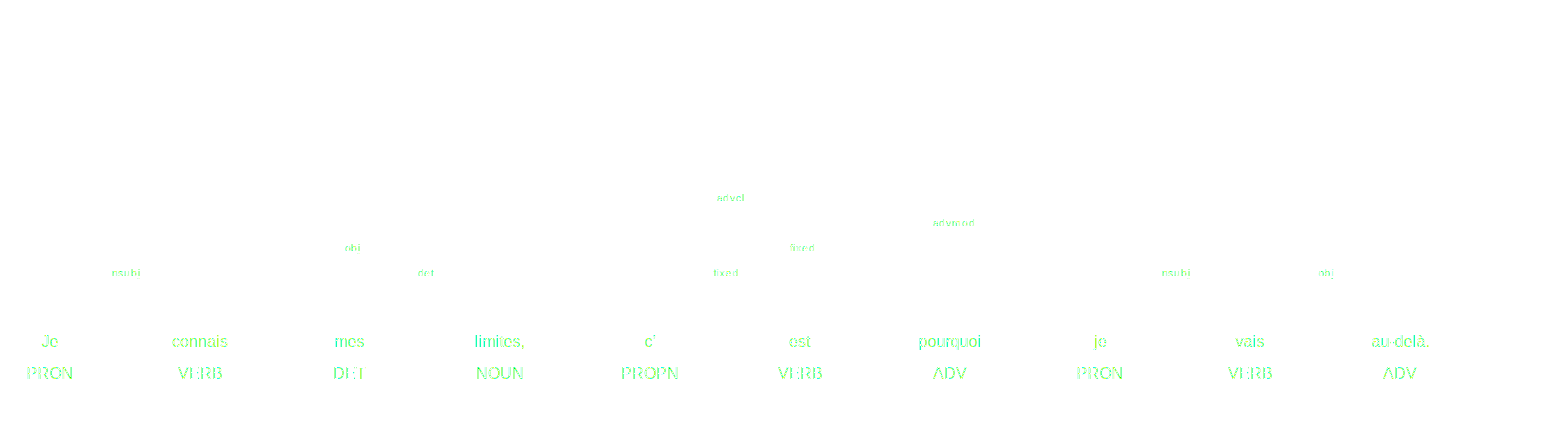

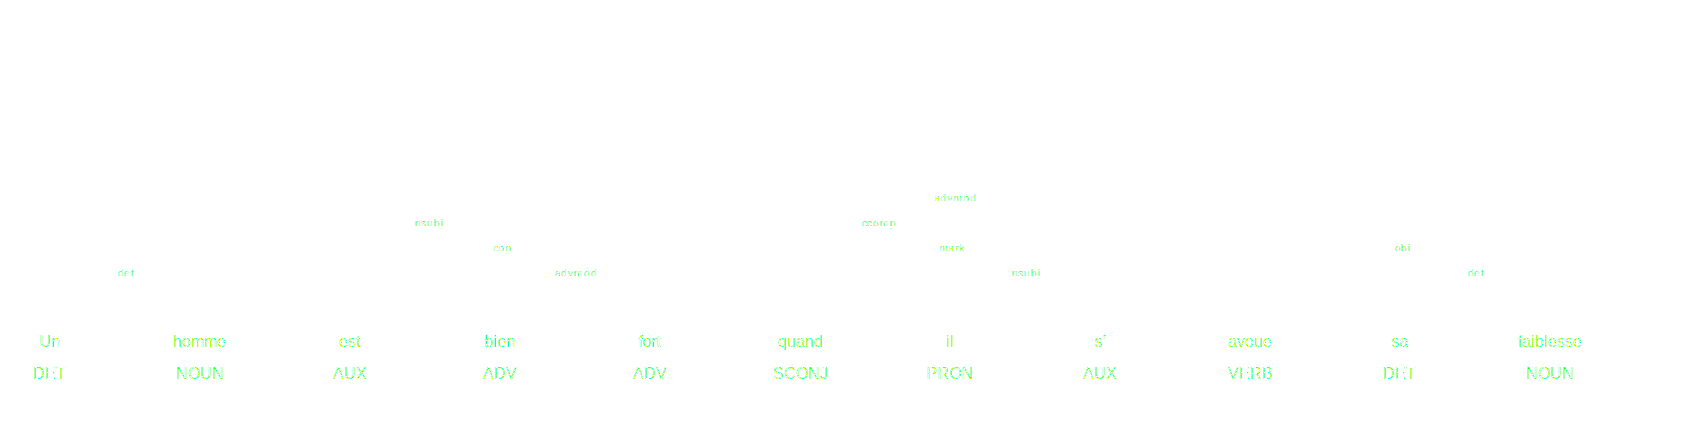

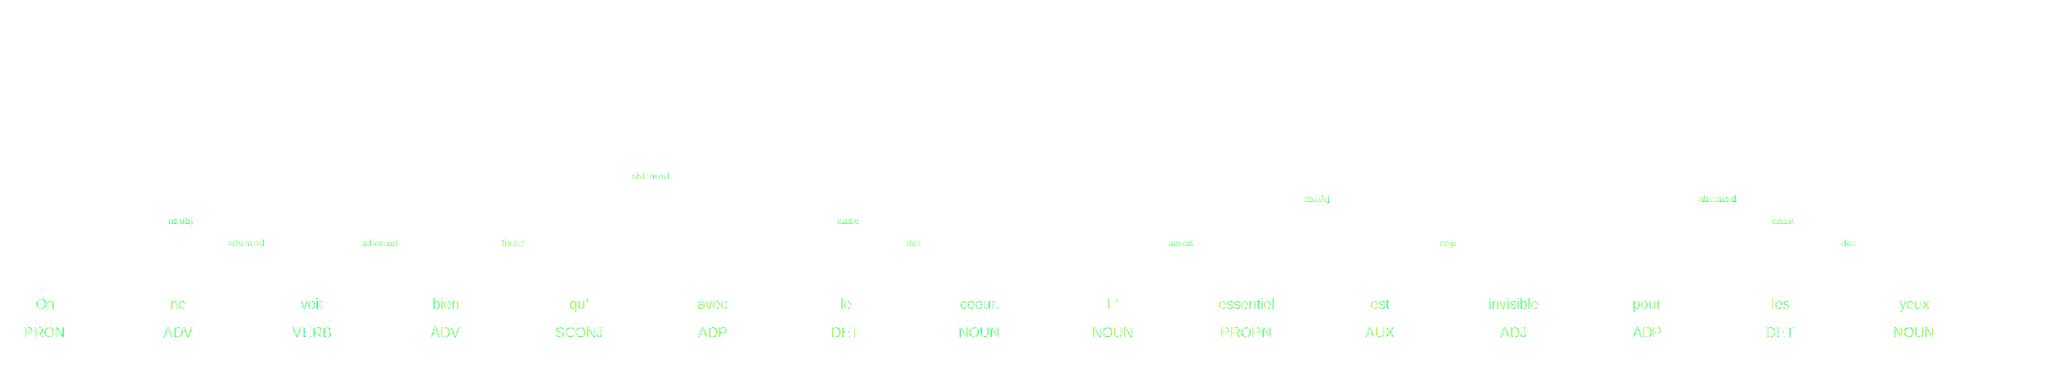

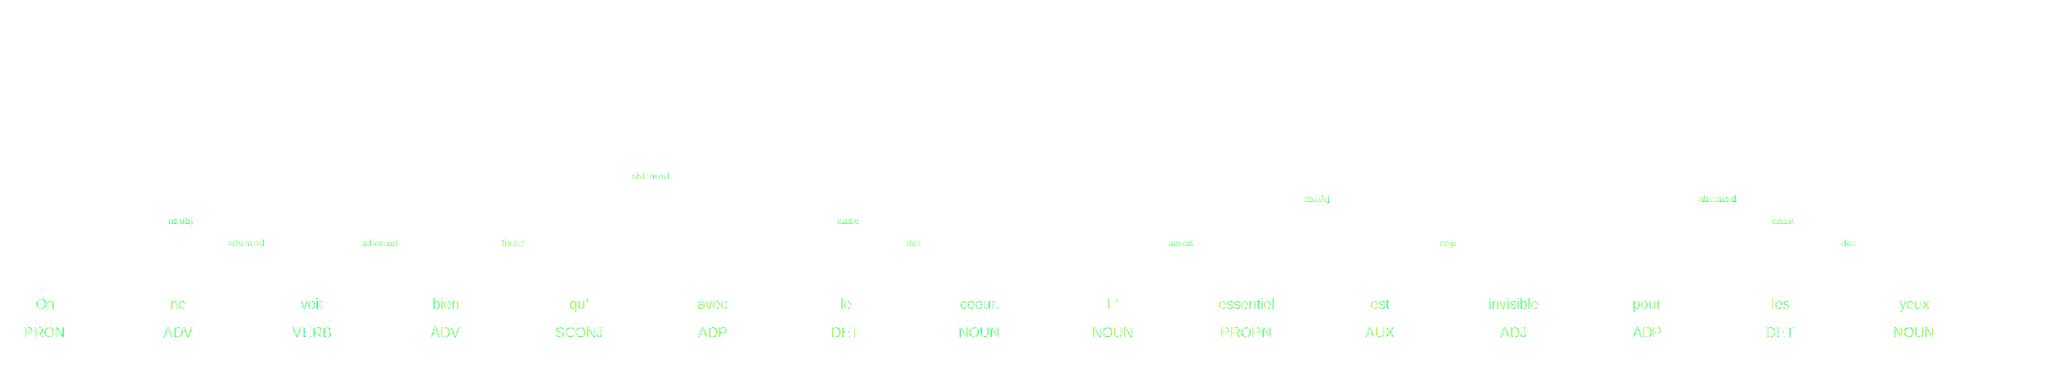

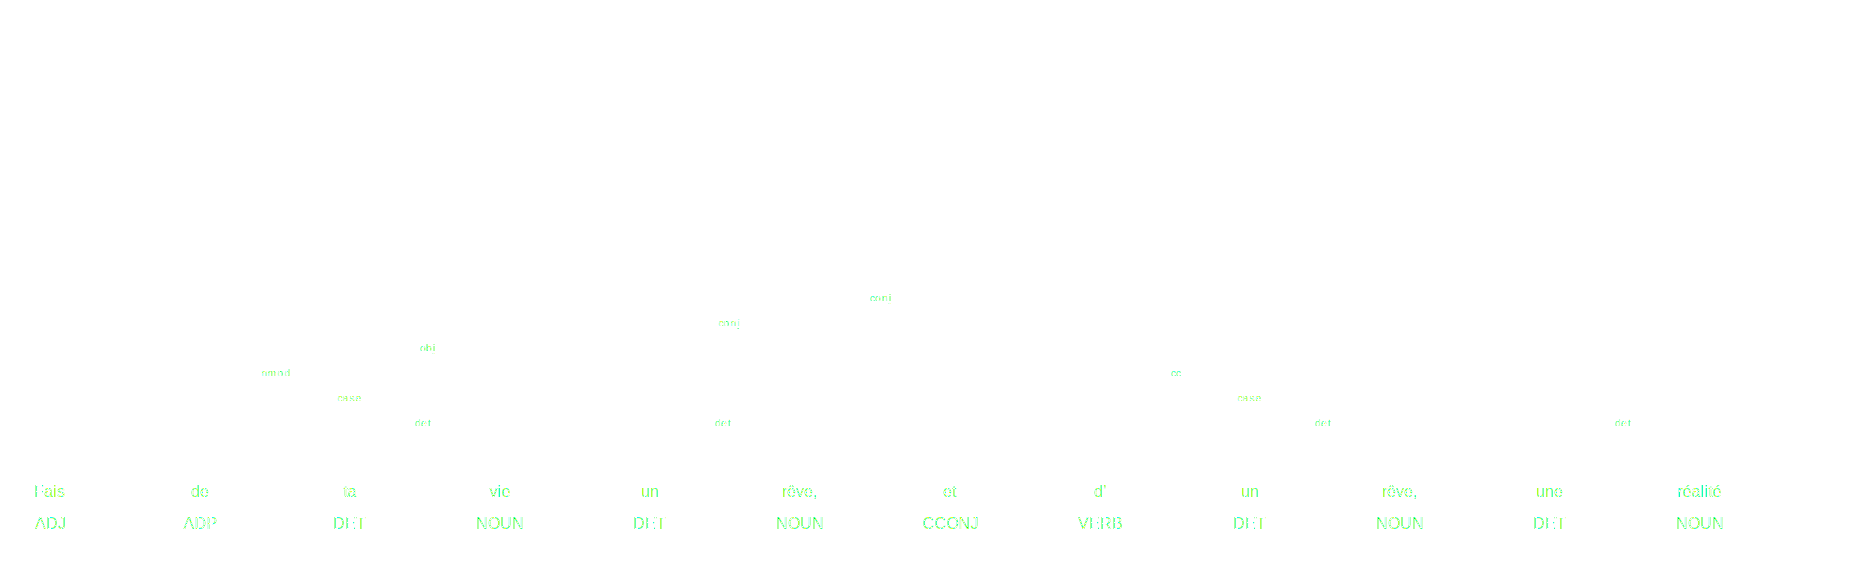

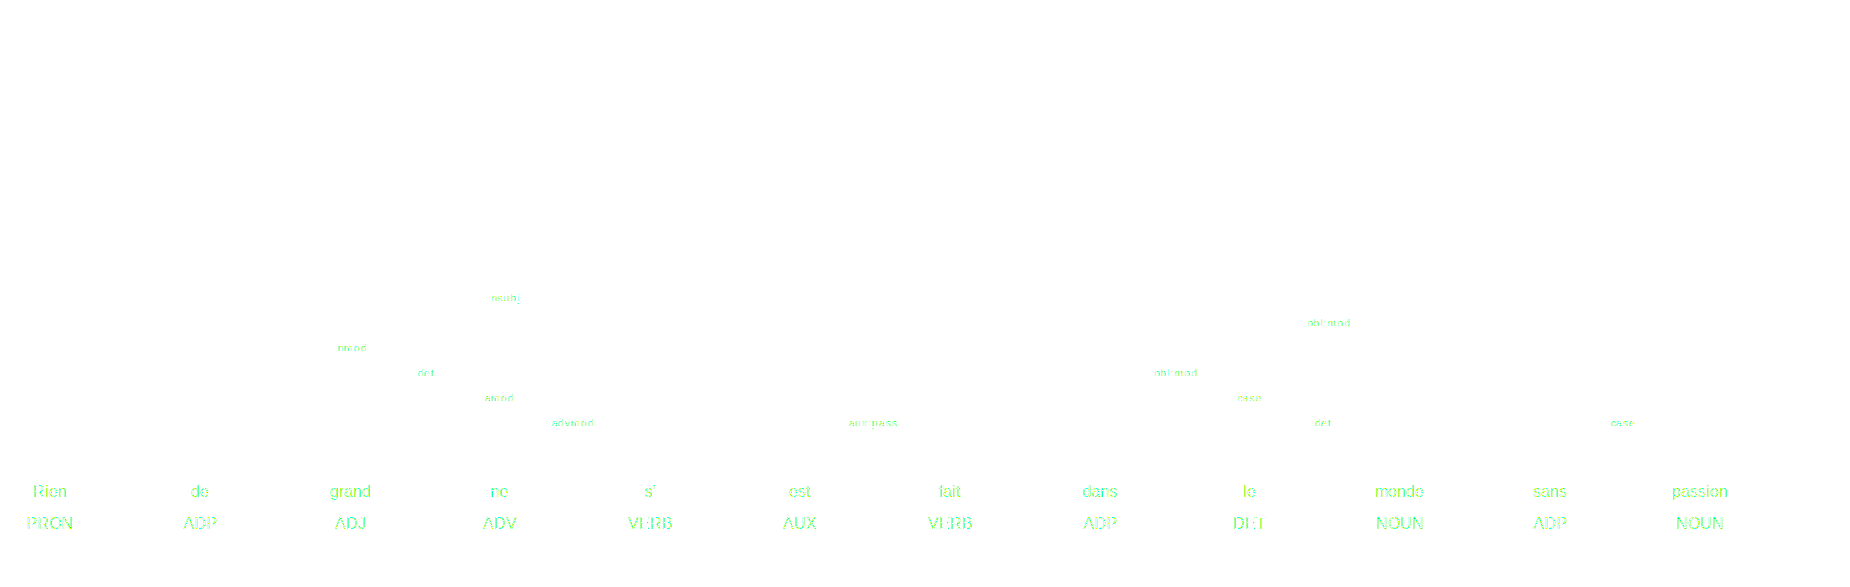

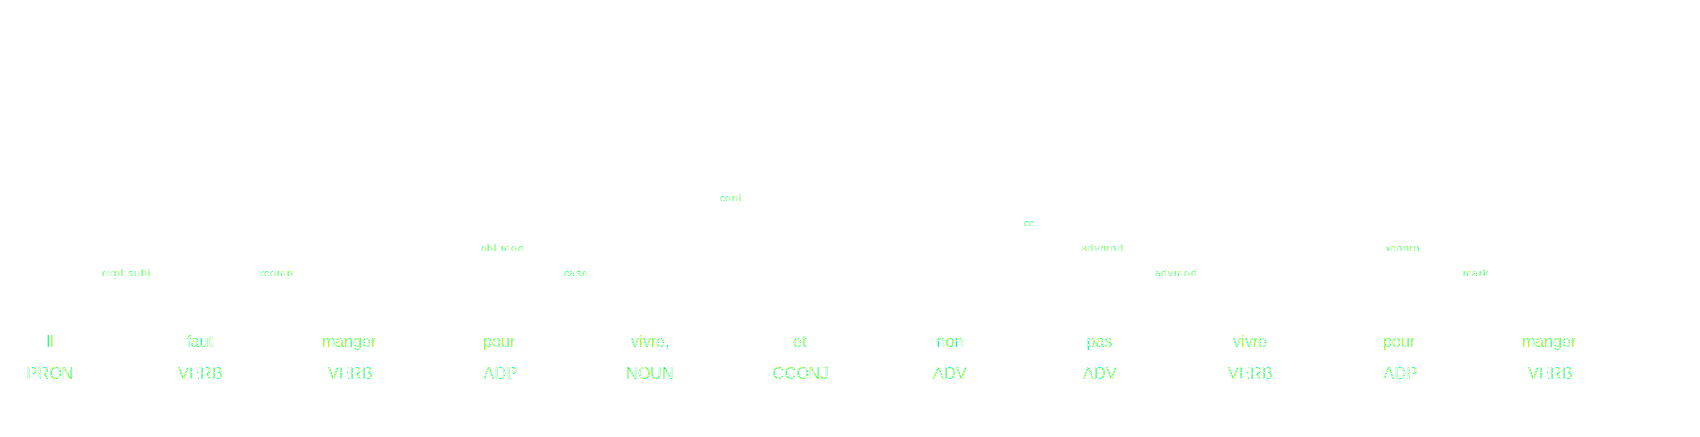

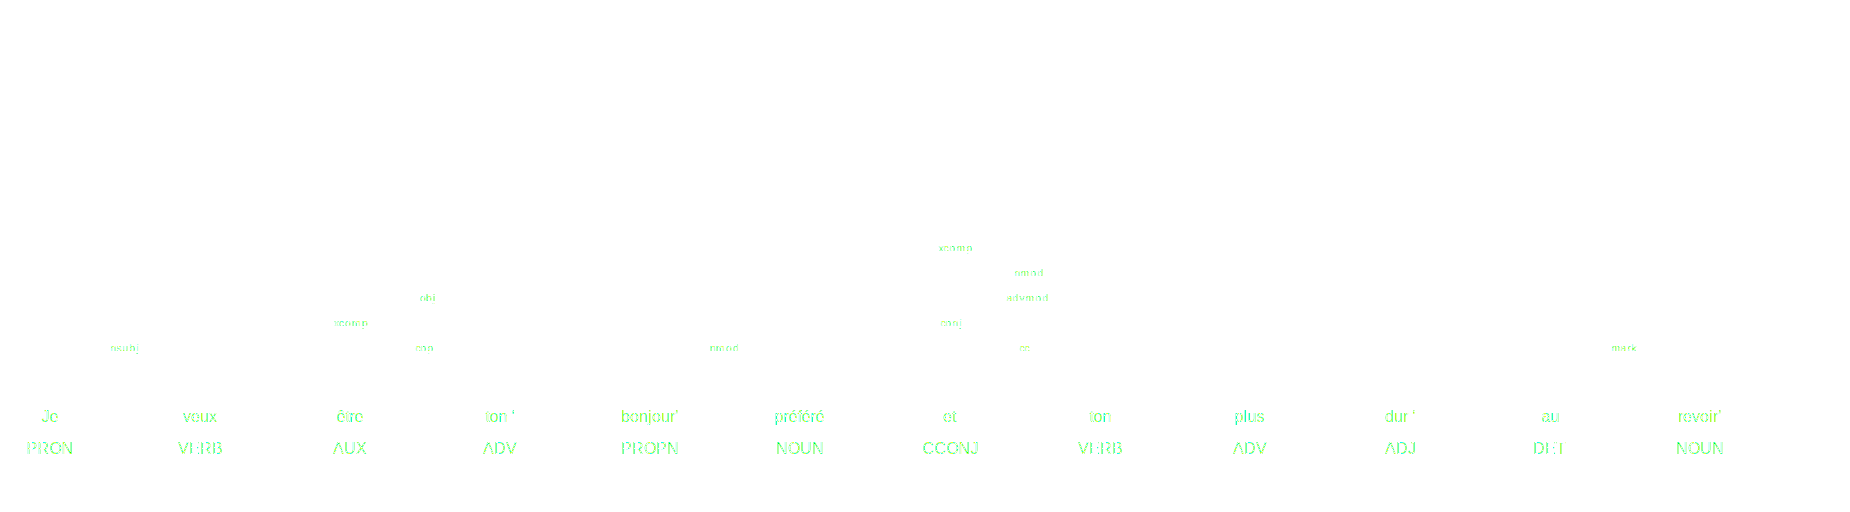

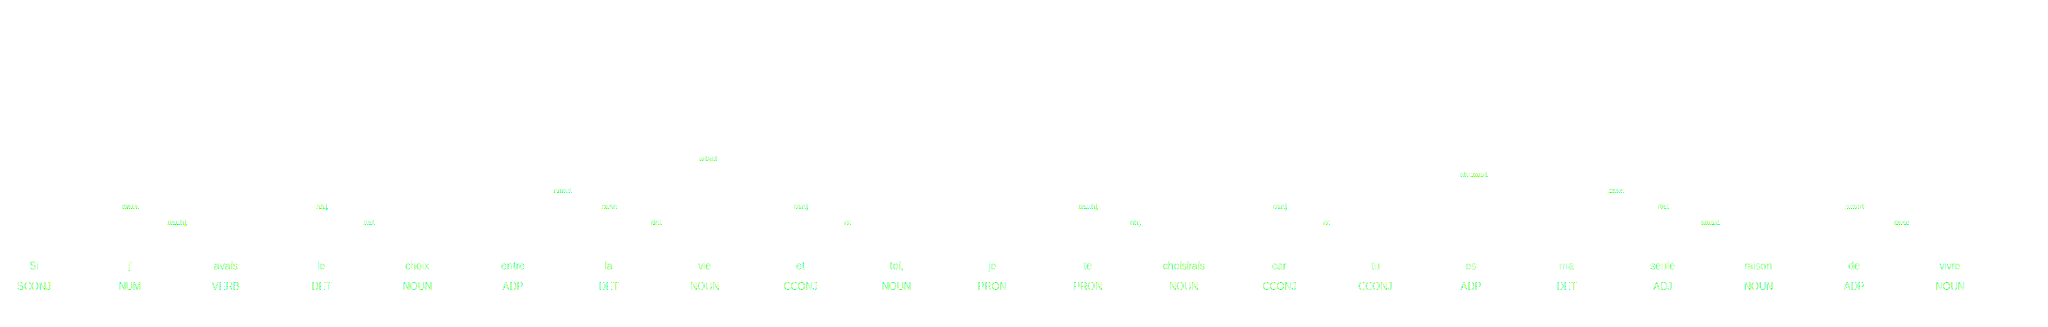

In [32]:
options = {"compact": True, "bg": "#09a3d5", "color": "white"}
for frtext in phrases:
  doc = nlpFR(frtext)
  graph01 = displacy.render(doc, options=options)
  showSVG(graph01)

# **Sentiment**

In [33]:
readSentiment = SentimentIntensityAnalyzer()

In [34]:
for txt in phrases:
  print(readSentiment.polarity_scores(txt))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7184}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


**Comparer le sentiment français avec d'autres langues**

In [35]:
translator = Translator()

In [38]:
# traduire en anglais
phrasesEn = [translator.translate(txt).text for txt in phrases]

In [39]:
# translate to traduire en portugais
phrasesBr = [translator.translate(txt, dest='pt').text for txt in phrases]

In [40]:
for txt in phrasesEn:
  print(readSentiment.polarity_scores(txt))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.836}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.18, 'neu': 0.449, 'pos': 0.372, 'compound': 0.4576}
{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7845}
{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7845}
{'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.7003}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.6979}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.106, 'neu': 0.65, 'pos': 0.244, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [41]:
for txt in phrasesBr:
  print(readSentiment.polarity_scores(txt))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [42]:
def getSentiment(phrase):
  s = readSentiment.polarity_scores(phrase)
  if s['compound'] <= -0.05:
    sentiment = 0
  elif s['compound'] >= 0.05:
    sentiment = 1
  else:
    sentiment = 2
  return sentiment, s

In [43]:
sentiments = ['Negative', 'Positive', 'Neutral']
for txt in phrases:
  print(sentiments[getSentiment(txt)[0]], ' - ', txt)

Neutral  -  Je pense donc je suis
Positive  -  Le plus grand plaisir dans la vie, c’est de faire les choses que les gens disent impossibles
Neutral  -  Je connais mes limites, c’est pourquoi je vais au-delà.
Neutral  -  Un homme est bien fort quand il s’avoue sa faiblesse
Neutral  -  On ne voit bien qu’avec le coeur. L’essentiel est invisible pour les yeux
Neutral  -  On ne voit bien qu’avec le coeur. L’essentiel est invisible pour les yeux
Neutral  -  Fais de ta vie un rêve, et d’un rêve, une réalité
Positive  -  Rien de grand ne s’est fait dans le monde sans passion
Neutral  -  Il faut manger pour vivre, et non pas vivre pour manger
Neutral  -  Je veux être ton ‘bonjour’ préféré et ton plus dur ‘au revoir’
Neutral  -  Si j’avais le choix entre la vie et toi, je te choisirais car tu es ma seule raison de vivre


# **Textes en ligne**

Obtenons quelques gros titres (titres) sur CNN et ESPN par flux RSS

In [48]:
sources = [
'https://feeds.leparisien.fr/leparisien/rss/faits-divers',
'https://feeds.leparisien.fr/leparisien/rss/politique',
'https://feeds.leparisien.fr/leparisien/rss/economie',
'https://feeds.leparisien.fr/leparisien/rss/international',  
'https://feeds.leparisien.fr/leparisien/rss/sports',
'https://feeds.leparisien.fr/leparisien/rss/culture-loisirs',
'https://feeds.leparisien.fr/leparisien/rss/environnement'  
]
feeds = []
for s in sources:
  feed = feedparser.parse(s)
  feeds.append(feed)

In [49]:
titles = []
summaries = []
for feed in feeds:
  for content in feed.entries:
    titles.append(content.title)
    try:
      summaries.append(content.summary)
    except:
      summaries.append(content.title)

In [50]:
def cleaningText(original, show=False):
  txt = original
  txt = txt.lower() # lowercase
  txt = re.sub('@','',txt) # remove @ 
  txt = re.sub('\[.*\]','',txt) # remove contents between brackets
  txt = re.sub('<.*?>+','',txt) # remove contents between less and more signs
  txt = re.sub('https?://\S+|www\.\S+', '', txt) # remove URLs
  txt = re.sub(re.escape(string.punctuation), '', txt) # remove punctuation
  txt = re.sub(r'[^a-zA-Z ]+', '', txt) # remove numbers
  txt = re.sub('\n', '', txt) # remove line break
  txt = str(txt).strip()
  if show:
    print('ORIGINAL: ', original)
    print('   TEXT CLEANNED: ', txt)
  return txt

In [51]:
titlesClean = [cleaningText(title) for title in titles]

In [52]:
sent = []
for txt in titles:
  sent.append(getSentiment(txt)[0])

dfT = pd.DataFrame()
dfT['title'] = titles
dfT['titleClean'] = titlesClean
dfT['sentimentTitle'] = sent

In [53]:
dfTitle = dfT[['sentimentTitle','title']].groupby('sentimentTitle').count()

In [65]:
colors=['#E6E6E6', '#8A0808', '#088A08']
px.pie(names=sentiments, values=dfTitle.values, title='Sentiment Analysis - Titles', 
       color_discrete_sequence=colors)

# **Analyse des mots**

In [56]:
translator.translate("creating a word's list", dest='fr').text

'créer une liste de mots'

In [57]:
def tokenizeStr(original):
  txt2 = nlpFR(original) # créer une liste de mots
  txt2 = [token.lemma_ for token in txt2 if not nlpFR.vocab[token.text].is_stop]
  punct = string.punctuation
  stopwords = list(stopWordFR)
  ws = string.whitespace
  txt2 = [word for word in txt2 if word not in stopwords and word not in punct if len(word)>2]
  return txt2

In [58]:
wordsT = [word for i in range(0, len(dfT)-1) for word in tokenizeStr(dfT.iloc[i].titleClean) if str(word).strip() != '']
wordsTn = pd.value_counts(wordsT)

In [59]:
wordlist = pd.value_counts(wordsT)

In [60]:
topW = pd.DataFrame(data={'tag': wordlist.index, 'count':wordlist.values})

In [61]:
px.bar(topW[:10], y='tag', x='count', orientation='h', 
       title='Top 10 mots', color='tag')

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS as stc
stopwordsCloud = set(stc)

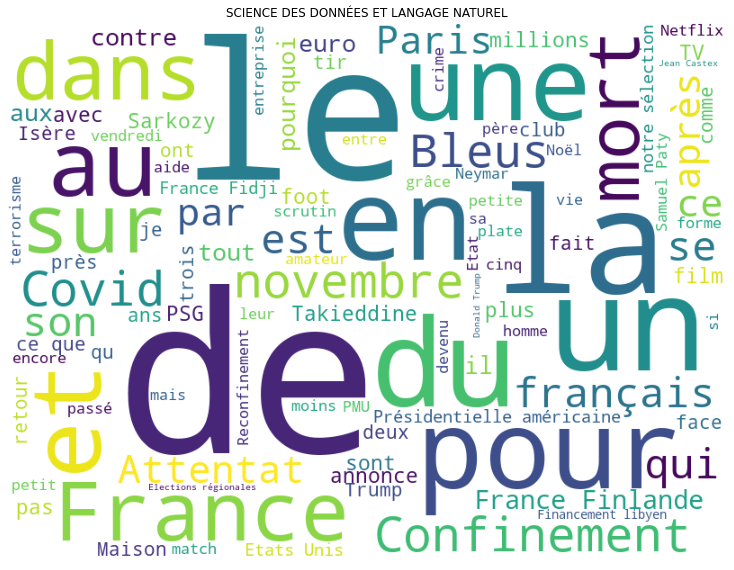

In [63]:
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                stopwords = stopwordsCloud, 
                min_font_size = 10).generate(' '.join(dfT.title)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('SCIENCE DES DONNÉES ET LANGAGE NATUREL')
  
plt.show() 